## Resultados


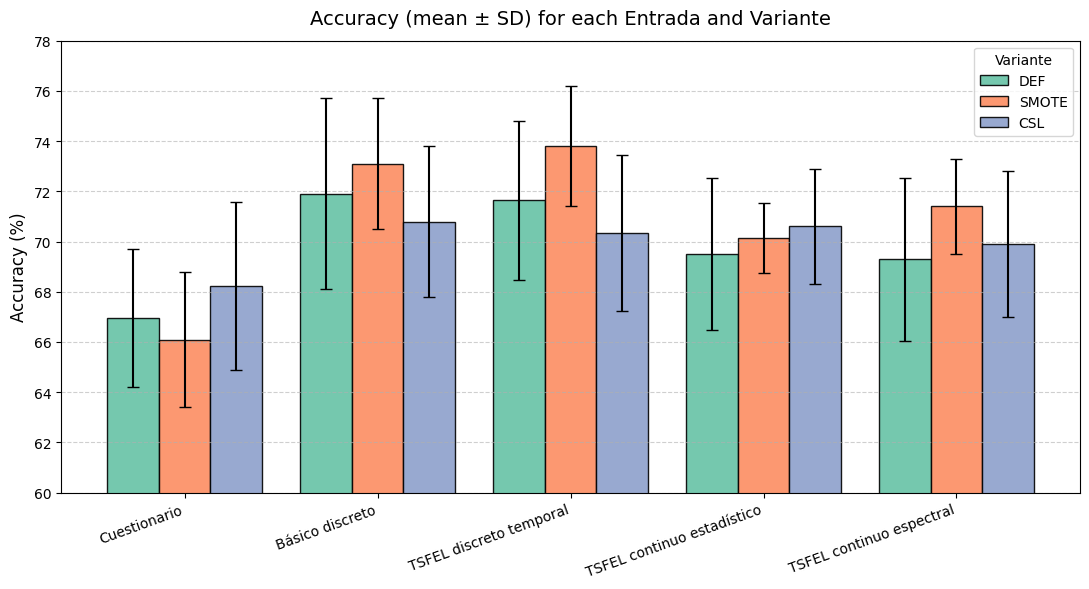

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "Entrada": [
        "Cuestionario", "Cuestionario", "Cuestionario",
        "Básico discreto", "Básico discreto", "Básico discreto",
        "TSFEL discreto temporal", "TSFEL discreto temporal", "TSFEL discreto temporal",
        "TSFEL continuo estadístico", "TSFEL continuo estadístico", "TSFEL continuo estadístico",
        "TSFEL continuo espectral", "TSFEL continuo espectral", "TSFEL continuo espectral"
    ],
    "Variante": ["DEF", "SMOTE", "CSL"] * 5,
    "Accuracy_mean": [
        66.95, 66.09, 68.24,
        71.90, 73.10, 70.79,
        71.64, 73.80, 70.34,
        69.51, 70.15, 70.60,
        69.29, 71.40, 69.90
    ],
    "Accuracy_std": [
        2.75, 2.68, 3.34,
        3.80, 2.60, 3.01,
        3.17, 2.40, 3.12,
        3.02, 1.40, 2.30,
        3.24, 1.90, 2.90
    ]
}

df = pd.DataFrame(data)

entrada_order = [
    "Cuestionario",
    "Básico discreto",
    "TSFEL discreto temporal",
    "TSFEL continuo estadístico",
    "TSFEL continuo espectral"
]

df["Entrada"] = pd.Categorical(df["Entrada"], categories=entrada_order, ordered=True)
df.sort_values(["Entrada", "Variante"], inplace=True)

variants = ["DEF", "SMOTE", "CSL"]
colors = dict(zip(variants, plt.cm.Set2.colors[:3]))   # nice pastel palette
group_positions = np.arange(len(entrada_order))
group_width = 0.8          # overall width of each Entrada group
bar_width = group_width / len(variants)

fig, ax = plt.subplots(figsize=(11, 6))

# Draw the bars with error bars
for i, variant in enumerate(variants):
    variant_df = df[df["Variante"] == variant]
    means = variant_df["Accuracy_mean"].values
    stds = variant_df["Accuracy_std"].values

    bar_x = group_positions + (i - 1) * bar_width
    ax.bar(
        bar_x,
        means,
        yerr=stds,
        width=bar_width,
        label=variant,
        color=colors[variant],
        capsize=4,
        alpha=0.9,
        edgecolor="black"
    )

# Cosmetic touches
ax.set_ylabel("Accuracy (%)", fontsize=12)
ax.set_title("Accuracy (mean ± SD) for each Entrada and Variante", fontsize=14, pad=12)
ax.set_xticks(group_positions)
ax.set_xticklabels(entrada_order, rotation=20, ha="right")
ax.set_ylim([60, 78])                     # adjust if you want more/less headroom
ax.legend(title="Variante")
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
